<a href="https://colab.research.google.com/github/caesar013/PCVK_GENAP_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  google.colab import drive

# Access GDrive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Nomer 1

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


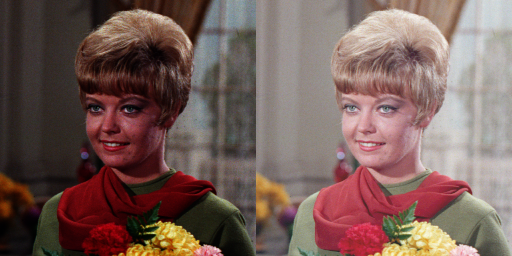

In [ ]:
# No 1
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

img_female = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/female.tiff')

# gamma_image = [[[np.clip((img_female[row,column,channel] / 255.0) ** (1/gamma) * 255.0, 0,255) for row in range(img_female.shape[0]) for column in range(img_female.shape[1]) for channel in range(img_female.shape[2])]]]

gamma_image = np.clip((img_female / 255.0) ** (1/gamma) * 255.0, 0, 255).astype(np.uint8)

# print(img_female.shape)
# print(gamma_image.shape)
cv2_imshow(cv.hconcat((img_female,gamma_image)))

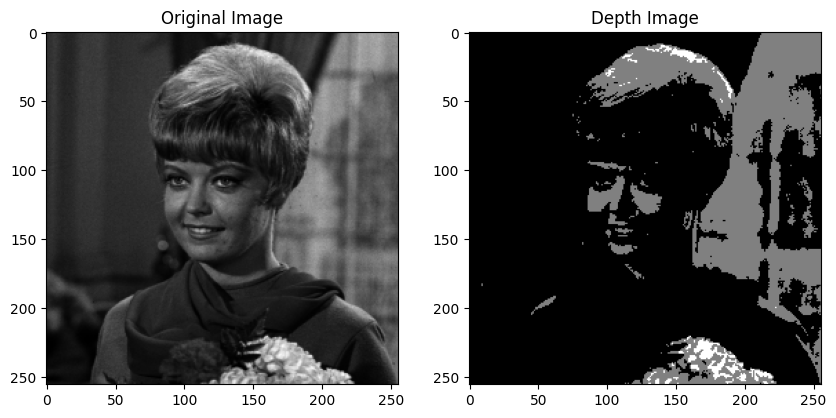

In [ ]:
# No 2
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

depth_image = (original / level).astype(np.uint8) * level

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(original, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(depth_image, cmap='gray')
axs[1].set_title('Depth Image')

plt.show()

In [41]:
# No 3
import glob

PSNR 20 : 19.830858860645332


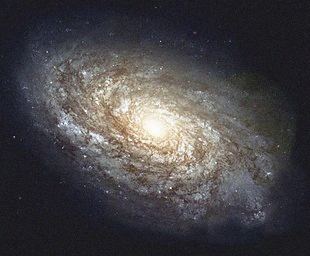

PSNR 40 : 19.88517406872565


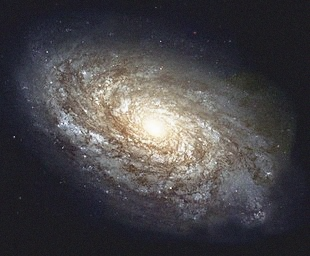

PSNR 60 : 19.905366216793883


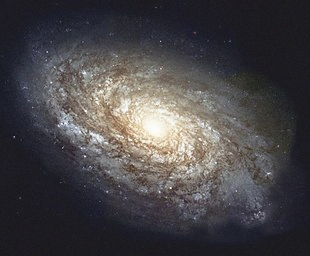

PSNR 80 : 19.915805757380262


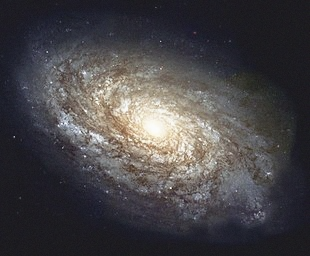

PSNR 100 : 19.92196095594035


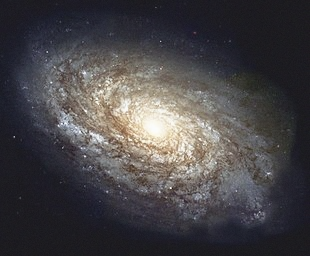

In [15]:
def average_denoising(images):
  denoised_image = np.zeros((images[0].shape[0], images[0].shape[1], 3), dtype=np.float32)

  for img in images:
    denoised_image += img.astype(np.float32)

  denoised_image = denoised_image / len(images)

  denoised_image = denoised_image.astype(np.uint8)

  return denoised_image

original = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/galaxy.jpg')
images = []
for img in glob.glob('/content/drive/MyDrive/PCVK/Images for PCVK/noises/*'):
 images.append(cv.imread(img))

for i, subset_size in enumerate([20,40,60,80,100]):
  subset = images[:subset_size]
  denoised_image = average_denoising(subset)
  psnr_value = cv.PSNR(original,denoised_image)
  print(f"PSNR {subset_size} : {psnr_value}")
  cv2_imshow(denoised_image)

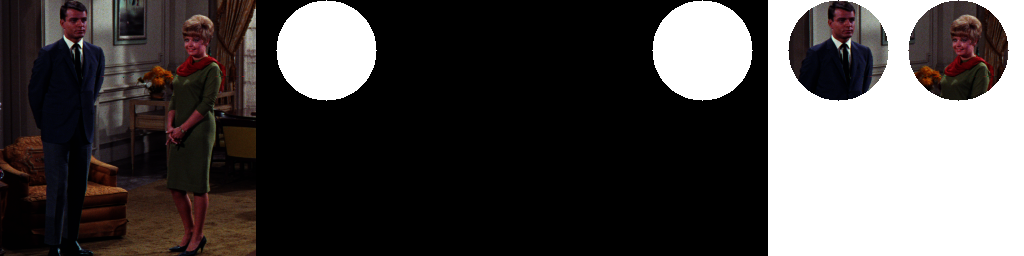

In [45]:
# No 4
original = cv.imread('/content/drive/MyDrive/PCVK/Images for PCVK/couple.tiff')

mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(original.shape, dtype=np.uint8)
# the code below will also overwrite the mask variable.
# mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)
# instead, let's use
mask2 = cv.circle(mask2, (190, 50), 50, (255,255,255), -1)
# this way, we can get 2 completely different variable

result = original & (mask | mask2)
# (mask | mask2)
# this line of code basically is stacked one to another.
# by doing so, we can get 2 white circle and a black background
result[(mask2==0) & (mask==0)] = 255
# every black(0,0,0) pixel in mask AND mask2 will become white.

cv2_imshow(cv.hconcat((original, mask, mask2, result)))

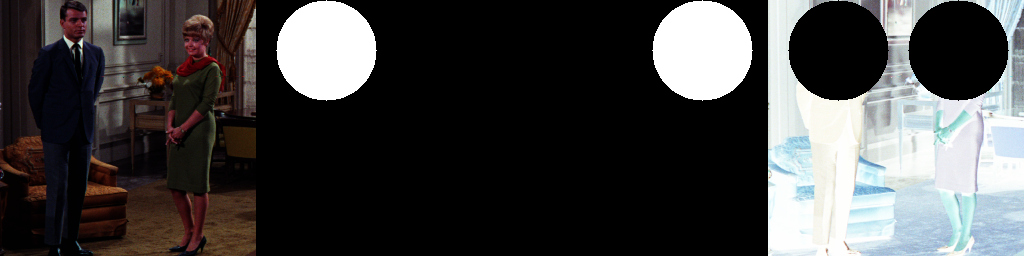

In [54]:
# No 5
# NOT
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(original.shape, dtype=np.uint8)
# the code below will also overwrite the mask variable.
# mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)
# instead, let's use
mask2 = cv.circle(mask2, (190, 50), 50, (255,255,255), -1)
# this way, we can get 2 completely different variable

result = ~original & ~(mask | mask2)
# (mask | mask2)
# this line of code basically is stacked one to another.
# by doing so, we can get 2 white circle and a black background

cv2_imshow(cv.hconcat((original, mask, mask2, result)))

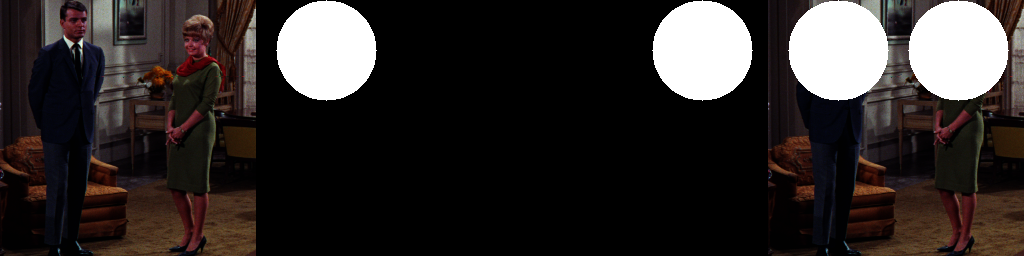

In [50]:
# OR
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(original.shape, dtype=np.uint8)
# the code below will also overwrite the mask variable.
# mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)
# instead, let's use
mask2 = cv.circle(mask2, (190, 50), 50, (255,255,255), -1)
# this way, we can get 2 completely different variable

result = original | (mask | mask2)
# (mask | mask2)
# this line of code basically is stacked one to another.
# by doing so, we can get 2 white circle and a black background

cv2_imshow(cv.hconcat((original, mask, mask2, result)))

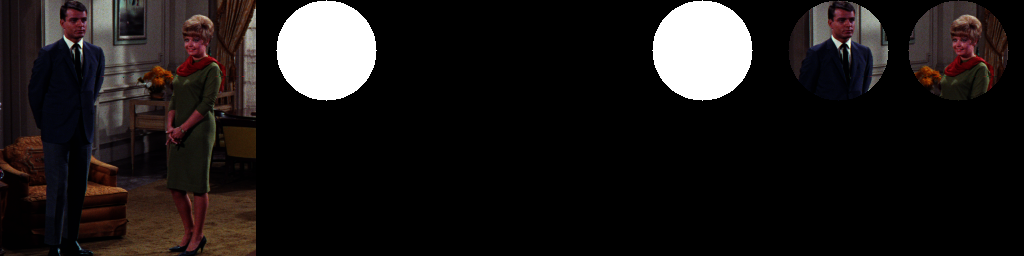

In [52]:
# AND
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(original.shape, dtype=np.uint8)
# the code below will also overwrite the mask variable.
# mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)
# instead, let's use
mask2 = cv.circle(mask2, (190, 50), 50, (255,255,255), -1)
# this way, we can get 2 completely different variable

result = original & (mask | mask2)
# (mask | mask2)
# this line of code basically is stacked one to another.
# by doing so, we can get 2 white circle and a black background

cv2_imshow(cv.hconcat((original, mask, mask2, result)))

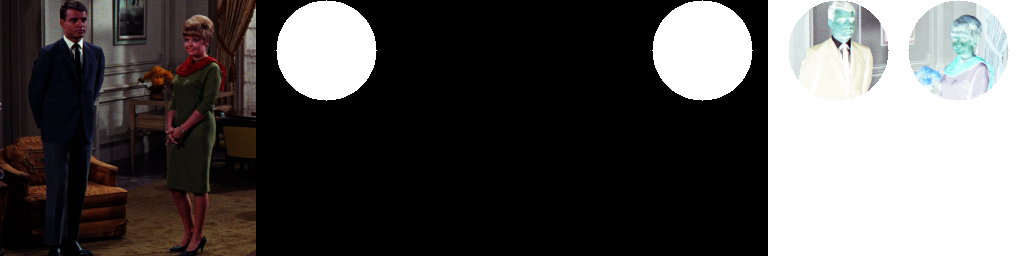

In [62]:
# NAND
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(original.shape, dtype=np.uint8)
# the code below will also overwrite the mask variable.
# mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)
# instead, let's use
mask2 = cv.circle(mask2, (190, 50), 50, (255,255,255), -1)
# this way, we can get 2 completely different variable

result = ~(original & (mask | mask2))
# (mask | mask2)
# this line of code basically is stacked one to another.
# by doing so, we can get 2 white circle and a black background

cv2_imshow(cv.hconcat((original, mask, mask2, result)))

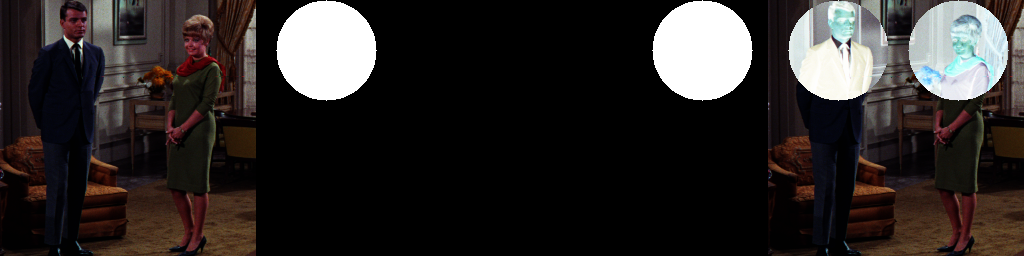

In [61]:
# XOR
mask = np.zeros(original.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(original.shape, dtype=np.uint8)
# the code below will also overwrite the mask variable.
# mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)
# instead, let's use
mask2 = cv.circle(mask2, (190, 50), 50, (255,255,255), -1)
# this way, we can get 2 completely different variable

result = original ^ (mask | mask2)
# (mask | mask2)
# this line of code basically is stacked one to another.
# by doing so, we can get 2 white circle and a black background

cv2_imshow(cv.hconcat((original, mask, mask2, result)))

## Tugas Kelompok

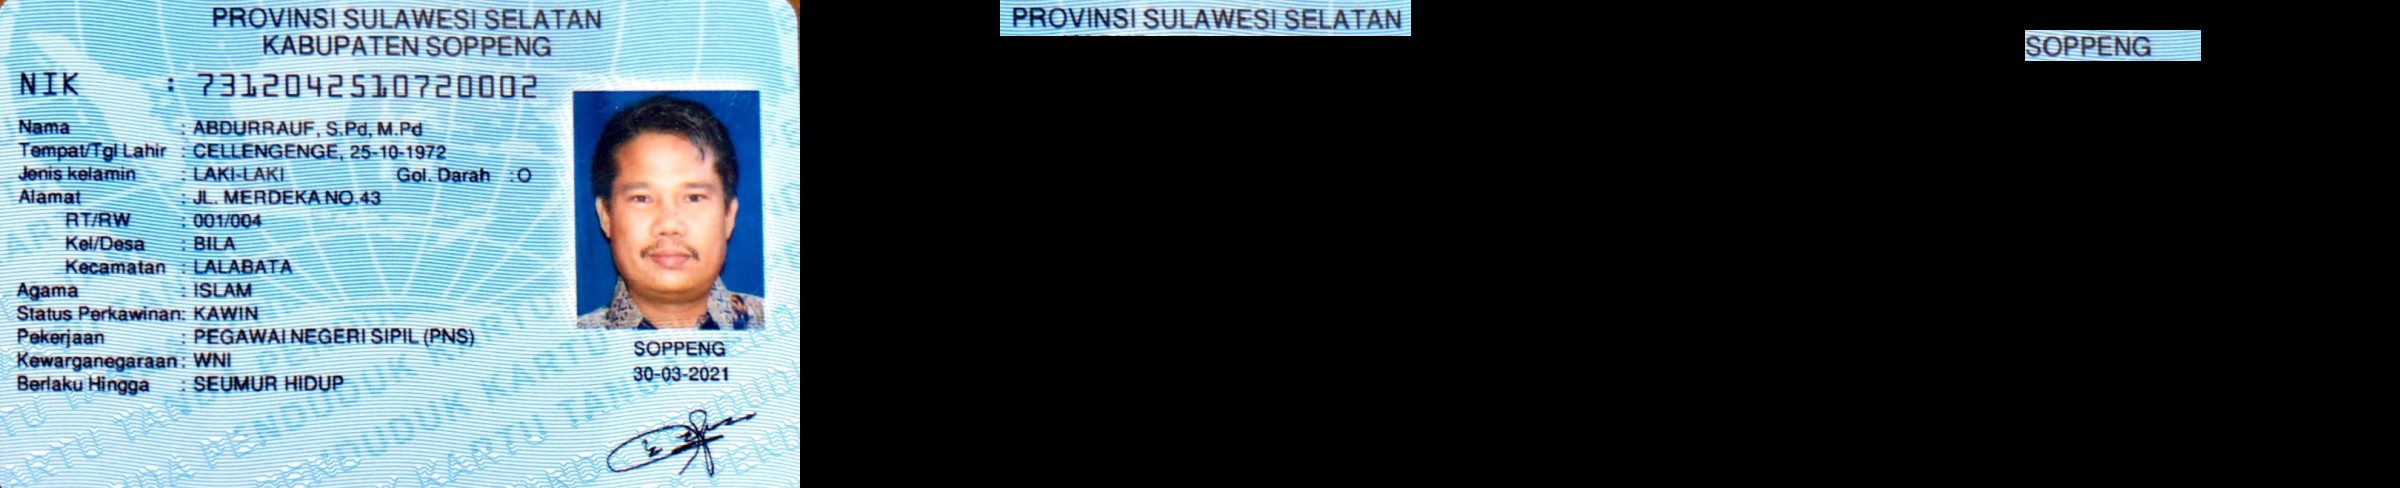

True

In [ ]:
# Membaca citra asli
img_asli = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# kotak = cv.rectangle(img_asli,(0,200), (70,600), (255,255,255), -1)
mask = np.zeros(img_asli.shape, dtype=np.uint8)
mask = cv.rectangle(mask,(200,0), (610,35), (255,255,255), -1)

mask2 = np.zeros(img_asli.shape, dtype=np.uint8)
mask2 = cv.rectangle(mask2,(425,30), (600,60), (255,255,255), -1)

result_kotak = img_asli & mask
result_kotak2 = img_asli & mask2

final_frame = cv.hconcat((img_asli, result_kotak, result_kotak2))
cv2_imshow(final_frame)

cv.imwrite('/content/drive/MyDrive/PCVK/KTP_provinsi.jpeg', result_kotak)
cv.imwrite('/content/drive/MyDrive/PCVK/KTP_kabupaten.jpeg', result_kotak2)

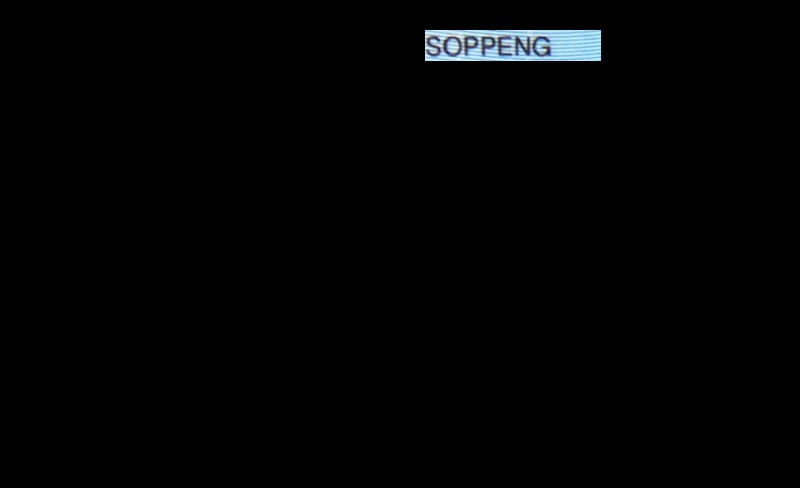

In [ ]:
cv2_imshow(cv.imread('/content/drive/MyDrive/PCVK/KTP_kabupaten.jpeg'))